In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [287]:
df = pd.read_csv("../input/test-file/tested.csv", encoding='ISO-8859-1')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [288]:
df.drop(['Cabin'], axis=1, inplace=True)


In [289]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [290]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [291]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [292]:
 df['Age'].fillna(df['Age'].mean(), inplace = True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [294]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [295]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [296]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [297]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [298]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [299]:

df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

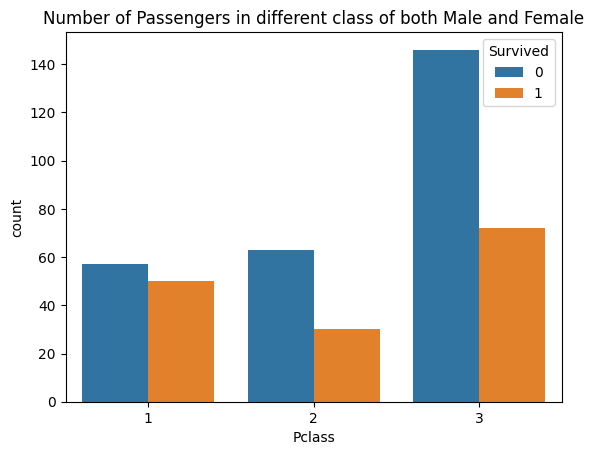

In [300]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df).set_title('Number of Passengers in different class of both Male and Female')

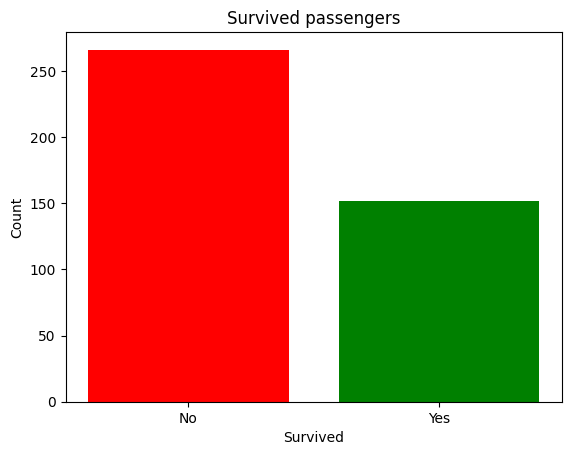

In [301]:
survived_counts = df['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts, color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived passengers')
plt.xticks(survived_counts.index, ['No', 'Yes'])
plt.show()

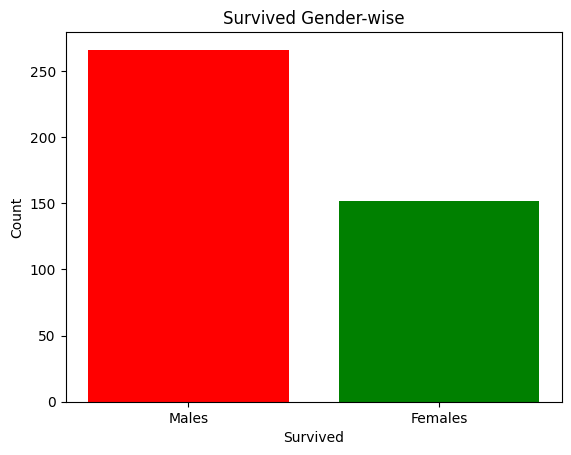

In [302]:
survived_counts = df['Sex'].value_counts()
plt.bar(survived_counts.index, survived_counts, color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived Gender-wise')
plt.xticks(survived_counts.index, ['Males', 'Females'])
plt.show()

In [303]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [304]:
df.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [305]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1


In [306]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188,1.464115
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.840500,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [307]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [308]:
X = df[features]
y = df['Survived']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [310]:
titanic_test = pd.get_dummies(X, columns=['Sex'], drop_first=True)

model = LogisticRegression(random_state = 0)

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [311]:
X_train_prediction = model.predict(X_train)

In [312]:
print(X_train_prediction)

[0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 1]


In [313]:
training_data = accuracy_score(y_train, X_train_prediction)
print('Accuracy = ', training_data)

Accuracy =  1.0


In [315]:
X_test_prediction = model.predict(X_test)
survival_rate = X_test_prediction.mean()
if survival_rate < 1:
    print("survived.")
else:
    print("Not survived")

survived.
